In [9]:
#from sSMC import MarginalDistr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class MarginalDistr:

    def __init__(self, la1, la2, mu1, mu2):
        #mu1, mu2 - migration  rates
        #la1, la2 - coalescent rates
        #init_cond - vector of length 3
        self.la1 = la1
        self.la2 = la2
        
        self.mu1 = mu1
        self.mu2 = mu2

        #self.init_cond = np.array(init_cond)/sum(init_cond)

        self.SetMatrix(0.0)

    def m1(self, t):
        return self.mu1

    def m2(self, t):
        return self.mu2

    def l1(self, t):
        return self.la1

    def l2(self, t):
        return self.la2

    def SetMatrix(self, t):
        self.A = np.matrix( [[-2*self.m1(t)-self.l1(t), 0, self.m2(t)],
                             [0, -2*self.m2(t)-self.l2(t), self.m1(t)],
                             [2*self.m1(t), 2*self.m2(t), -self.m1(t) - self.m2(t)]] )

    def CalcProb(self, t, init_cond):
        MET = linalg.expm( dot(self.A, t) )
        return dot(MET, init_cond)

    def CalcDist(self, num_steps, step, init_cond):
        pr_dist = np.zeros(num_steps+1)
        MET = linalg.expm( dot(self.A, step) )
        for i in range(num_steps):
            pr_dist[i] = self.la1*init_cond[0]+self.la2*init_cond[1]
            init_cond = dot(MET, init_cond)
        pr_dist[num_steps] = self.la1*init_cond[0]+self.la2*init_cond[1]
        return pr_dist

In [40]:
#md = MarginalDistr(0.1, 0.1, 1.0, 2.0)
#init_cond = np.array([1.0, 0.0, 0.0])
#p = md.CalcProb(1.0, init_cond)



#print(p)
#print(1-sum(p))

[0.30553514 0.00328325 0.10412313]
0.5870584828723702


100,110: num_a = 2, num_b = 1
    index_a = [0, 1]
    index_b = [1]
8.289773026992301e-05
8.289773026992303e-05


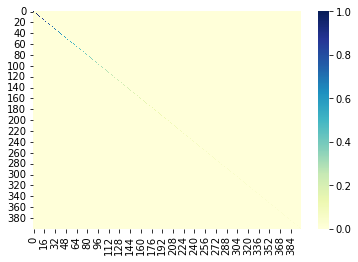

In [54]:
import numpy as np
from scipy import linalg
from scipy.integrate import odeint
from numpy import dot
import matplotlib.pyplot as plt

class lineage:
    def __init__(self, a, b, p):
        #a and b indicates ancestral material (1) or non-ancestral (0)
        self.a = a
        self.b = b
        self.p = p#0 or 1 population

    def __str__(self):
        return str(self.a)+str(self.b)+str(self.p)

class state:
    def __init__(self, lng):
        self.lng = lng
        self.l = len(lng)
        self.name()
        self.stat()

    def name(self):
        lng_s = []
        for l in self.lng:
            lng_s.append( str(l.a) + str(l.b) + str(l.p) )
        lng_s.sort()
        self.n = ','.join(lng_s)
        
    def stat(self):
        self.num = {'a': 0, 'b': 0}
        self.index = {'a':[-1,-1],'b':[-1,-1]}
        ai, bi = 0, 0
        for i, l in enumerate(self.lng):
            if l.a == 1:
                self.num['a'] += 1
                self.index['a'][ai] = i
                ai += 1
            if l.b == 1:
                self.num['b'] += 1
                self.index['b'][bi] = i
                bi += 1
                
    def __str__(self):
        prstr = self.n + ": " + "num_a = " + str(self.num['a']) + ", " + "num_b = " + str(self.num['b']) + "\n    " + "index_a = " + str(self.index['a'][0:self.num['a']]) + "\n    " + "index_b = " + str(self.index['b'][0:self.num['b']])
        return(prstr)

numStates =[
#    [ [1,1,0] ],
#    [ [1,1,1] ],

    [ [1,1,0],[1,1,0] ],
    [ [1,1,0],[1,1,1] ],
    [ [1,1,1],[1,1,1] ],

    [ [1,0,0],[1,1,0] ],
    [ [1,0,0],[1,1,1] ],
    [ [1,0,1],[1,1,0] ],
    [ [1,0,1],[1,1,1] ],

    [ [0,1,0],[1,1,0] ],
    [ [0,1,0],[1,1,1] ],
    [ [0,1,1],[1,1,0] ],
    [ [0,1,1],[1,1,1] ],

    [ [0,1,0],[1,0,0] ],
    [ [0,1,0],[1,0,1] ],
    [ [0,1,1],[1,0,0] ],
    [ [0,1,1],[1,0,1] ],

    [ [1,0,0],[0,1,0],[1,1,0] ],
    [ [1,0,0],[0,1,0],[1,1,1] ],
    [ [1,0,0],[0,1,1],[1,1,0] ],
    [ [1,0,0],[0,1,1],[1,1,1] ],
    [ [1,0,1],[0,1,0],[1,1,0] ],
    [ [1,0,1],[0,1,0],[1,1,1] ],
    [ [1,0,1],[0,1,1],[1,1,0] ],
    [ [1,0,1],[0,1,1],[1,1,1] ],

    [ [1,0,0],[0,1,0],[0,1,0] ],
    [ [1,0,0],[0,1,0],[0,1,1] ],
    [ [1,0,0],[0,1,1],[0,1,1] ],
    [ [1,0,1],[0,1,0],[0,1,0] ],
    [ [1,0,1],[0,1,0],[0,1,1] ],
    [ [1,0,1],[0,1,1],[0,1,1] ],

    [ [1,0,0],[1,0,0],[0,1,0] ],
    [ [1,0,0],[1,0,0],[0,1,1] ],
    [ [1,0,0],[1,0,1],[0,1,0] ],
    [ [1,0,0],[1,0,1],[0,1,1] ],
    [ [1,0,1],[1,0,1],[0,1,0] ],
    [ [1,0,1],[1,0,1],[0,1,1] ],

    [ [1,0,0],[1,0,0],[0,1,0],[0,1,0] ],
    [ [1,0,0],[1,0,0],[0,1,0],[0,1,1] ],
    [ [1,0,0],[1,0,0],[0,1,1],[0,1,1] ],
    [ [1,0,0],[1,0,1],[0,1,0],[0,1,0] ],
    [ [1,0,0],[1,0,1],[0,1,0],[0,1,1] ],
    [ [1,0,0],[1,0,1],[0,1,1],[0,1,1] ],
    [ [1,0,1],[1,0,1],[0,1,0],[0,1,0] ],
    [ [1,0,1],[1,0,1],[0,1,0],[0,1,1] ],
    [ [1,0,1],[1,0,1],[0,1,1],[0,1,1] ]
]

Mdim = len(numStates)

states = []
stateToNum = {}
i = 0
for st in numStates:
    lng = []
    for l in st:
        lng.append( lineage(l[0], l[1], l[2]) )
    states.append( state(lng) )
    stateToNum[states[-1].n] = i
    i += 1

def Eq(P, t):
    return dot(dot(M,params(t)),P)

def Coal(st, i, k):
    if i > st.l or k > st.l:
        print("Wrong lineage index.")
    if st.lng[i].p != st.lng[k].p:
        print("Coalescence is impossible.")
    newState = [st.lng[j] for j in range(st.l) if i != j and k != j]
    newState.append(lineage(st.lng[i].a | st.lng[k].a, st.lng[i].b | st.lng[k].b, st.lng[i].p))
    newState = state(newState)
    if newState.l > 1:
        return stateToNum[newState.n]
    else:
        return -1

#Matrix entry [rho, l1, l2, m1, m2]

def Matrix():
    trRate = np.zeros( (Mdim, Mdim, 5), int )
    for s in range(Mdim):
        st = states[s]
        for i in range(st.l):
            #recombination
            if st.lng[i].a & st.lng[i].b:
                newState = [st.lng[j] for j in range(st.l) if i != j]
                newState.append(lineage(1,0,st.lng[i].p))
                newState.append(lineage(0,1,st.lng[i].p))
                newState = state(newState)
                trRate[s,stateToNum[newState.n],0] += 1
                trRate[s,s,0] -= 1
            #coalescence
            for k in range(i+1,st.l):
                if st.lng[i].p == st.lng[k].p:
                    newState_id = Coal(st, i, k)
                    if newState_id != -1:
                        trRate[s, newState_id, st.lng[i].p+1 ] += 1
                    trRate[s, s, st.lng[i].p+1 ] -= 1
            #migration
            newState = [st.lng[j] for j in range(st.l) if i != j]
            newState.append( lineage(st.lng[i].a,st.lng[i].b,(st.lng[i].p+1)%2) )
            newState = state(newState)
            trRate[s, stateToNum[newState.n], st.lng[i].p+3 ] += 1
            trRate[s, s, st.lng[i].p+3 ] -= 1
    return( np.transpose(trRate, (1,0,2)) )

def FirstCoal(locus, t, popID = -1):
    matr = np.zeros( (Mdim, Mdim) )
    for s, st in enumerate(states):
        if not (st.num['a'] == 2 and st.num['b'] == 2 and st.l > 2):
            continue
        lng_i0, lng_i1 = st.index[locus][0], st.index[locus][1]
        if not (popID == -1 and st.lng[lng_i0].p == st.lng[lng_i1].p) and not (popID != -1 and st.lng[lng_i0].p == popID and st.lng[lng_i1].p == popID):
            continue
        newState_id = Coal(st, lng_i0, lng_i1)
        matr[ newState_id, s ] += params(t)[ st.lng[lng_i0].p + 1 ]
    return matr

def SecondCoal(locus, t, popID = -1):
    matr = np.zeros( (Mdim, Mdim) )
    
    locus2 = 'b'
    if locus == 'b':
        locus2 = 'a'
        
    for s, st in enumerate(states):
        if not (st.num[locus] == 2 and st.num[locus2] == 1):
            continue
        lng_i0, lng_i1 = st.index[locus][0], st.index[locus][1]
        if not (popID == -1 and st.lng[lng_i0].p == st.lng[lng_i1].p) and not (popID != -1 and st.lng[lng_i0].p == popID and st.lng[lng_i1].p == popID):
            continue
        newState_id = Coal(st, lng_i0, lng_i1)
        #print(st.n, states[newState_id].n)
        matr[ newState_id, s ] += params(t)[ st.lng[lng_i0].p + 1 ]
    return matr

def DoubleCoal(t, popID = -1):
    matr = np.zeros( (Mdim, Mdim) )
    for s, st in enumerate(states):
        if not (st.num['a'] == 2 and st.num['b'] == 2 and st.l == 2):
            continue
        lng_i0, lng_i1 = st.index['a'][0], st.index['a'][1]
        if not (popID == -1 and st.lng[lng_i0].p == st.lng[lng_i1].p) and not (popID != -1 and st.lng[lng_i0].p == popID and st.lng[lng_i1].p == popID):
            continue
        newState_id = Coal(st, lng_i0, lng_i1)
        #print(st.n, states[newState_id].n)
        matr[ newState_id, s ] += params(t)[ st.lng[lng_i0].p + 1 ]
    return matr

def params(t):
    return np.array([0.001, 1.0, 2.0, 0.1, 0.1])

print(states[3])

M = Matrix()

Pinit = np.zeros(Mdim)
Pinit[0] = 1.0

T = 1.
S = 2.

def densityTaTb(Ta, Tb, pop_a = -1, pop_b = -1):
    if Ta < Tb:
        Mexp = linalg.expm( dot(M, params(0))*Ta )
        P = dot(Mexp, Pinit)
        #print(P)
        P = dot(FirstCoal('a', Ta, pop_a), P)
        #print(P)
        Mexp = linalg.expm( dot(M, params(0))*(Tb-Ta) )
        P = dot(Mexp, P)
        #print(P)
        P = dot(SecondCoal('b', Tb, pop_b), P)
        #print(P)
    elif Ta > Tb:
        Mexp = linalg.expm( dot(M, params(0))*Tb )
        P = dot(Mexp, Pinit)
        P = dot(FirstCoal('b', Tb, pop_b), P)
        Mexp = linalg.expm( dot(M, params(0))*(Ta-Tb) )
        P = dot(Mexp, P)
        P = dot(SecondCoal('a', Ta, pop_a), P)
    else:
        Mexp = linalg.expm( dot(M, params(0))*Ta )
        P = dot(Mexp, Pinit)
        P = dot(DoubleCoal(Ta, pop_a), P)
    return( sum(P) )
        
    
    
print(densityTaTb(T, S))

print(densityTaTb(T, S, 0, 0) + densityTaTb(T, S, 1, 0) + densityTaTb(T, S, 0, 1) + densityTaTb(T, S, 1, 1))

#plt.imshow(densityTaTb)


dim = 400
dt = 100
if True:
    data = [[densityTaTb(i/dt, j/dt) for i in range(dim)] for j in range(dim) ]
    mask = [[False for i in range(dim)] for j in range(dim) ]
    #for i in range(dim):
    #    mask[i][i] = True
    #    data[i][i] = data[dim-1][dim-2]
    sns.heatmap(data, cmap="YlGnBu")#, mask = mask)

#times = [0.01*i for i in range(0,1001)]
#sol = odeint(Eq, Pinit, [0., T])
#print(sol[1])
#Pinit = np.multiply(FirstCoal('a', 0), sol[1])
#Pinit
#sol

#Mexp = linalg.expm( dot(M, params(0))*T )
#P = dot(Mexp, Pinit)
#print(P)

#P = dot(FirstCoal('a', T, 0), P)

#print(P)

#Mexp = linalg.expm( dot(M, params(0))*(S-T) )
#P = dot(Mexp, P)

#P0 = dot(SecondCoal('b', S, 0), P)
#P1 = dot(SecondCoal('b', S, 1), P)

md = MarginalDistr( params(0)[1], params(0)[2], params(0)[3], params(0)[4] )
init_cond = np.array([1.0, 0.0, 0.0])
#p = md.CalcProb(1.0, init_cond)

margdist = md.CalcDist(dim, 1/dt, init_cond)


<AxesSubplot:>

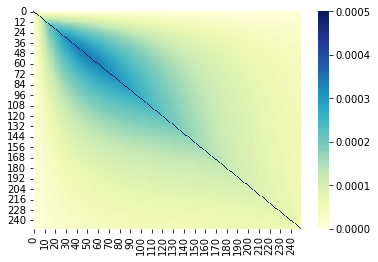

In [29]:
#sns.heatmap(data, cmap="YlGnBu", vmax=0.0005)
plt.plot(margdist)
#plt.plot(margdist/sum(margdist)*dt)
data = np.array(data)
plt.plot(np.sum(data, 0))
plt.xlim([0,int(2*dt)])
plt.show()

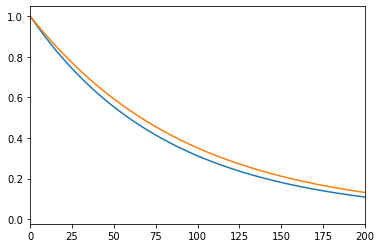

In [55]:
plt.plot(margdist)
#plt.plot(margdist/sum(margdist)*dt)
data = np.array(data)
plt.plot(np.sum(data, 0))
plt.xlim([0,int(2*dt)])
plt.show()

#plt.plot(np.sum(data, 1)/np.sum(data)*dt)

In [ ]:
M_smc = 

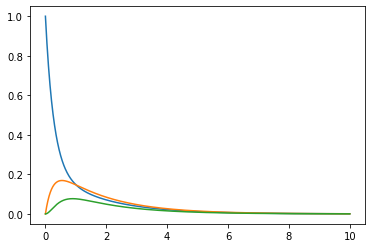

In [48]:
M = Matrix()
rho = 1.0

Pinit = np.zeros(Mdim)
Pinit[0] = 1.0

def params(t):
    return np.array([0.0001, 1.0, 2.0, 1., 1.])

def Eq(P, t):
    return dot(dot(M,params(t)),P)

times = [0.01*i for i in range(0,1001)]
sol = odeint(Eq, Pinit, times)

#print(M)
#print(dot(M,params(0)))
#print(sol)
plt.plot(times, sol[:,0])
plt.plot(times, sol[:,1])
plt.plot(times, sol[:,2])

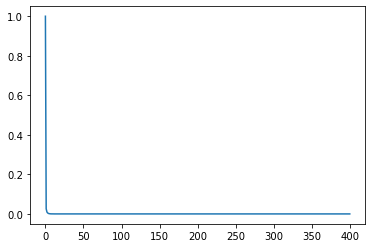

In [59]:
tau = dim/dt

Pinit = np.zeros(Mdim)
Pinit[0] = 1.0

Mexp = linalg.expm( dot(M, params(0))*tau )
margdist1 = []

#coal_vec = np.zeros(len(states))
coal_vec = []
for st in states:
    if st.num['a'] == 2:
        lng_i0, lng_i1 = st.index['a'][0], st.index['a'][1]
        if st.lng[lng_i0].p == st.lng[lng_i1].p:
            coal_vec.append( params(0)[st.lng[lng_i0].p + 1] )
        else:
            coal_vec.append( 0.0 )
    else:
        coal_vec.append( 0.0 )
coal_vec = np.array(coal_vec)

for i in range(dim+1):
    margdist1.append( dot(Pinit, coal_vec) )
    Pinit = dot(Mexp, Pinit)
    
plt.plot(margdist1)


In [40]:
#def params(t):
#    return np.array([0.001, 1.0, 2.0, 1., 1.])

M = Matrix()

Pinit = np.zeros(Mdim)
Pinit[0] = 1.0

T = 0.1

#times = [0.01*i for i in range(0,1001)]
sol = odeint(Eq, Pinit, [0,T])

Pinit = np.multiply(FirstCoal('a', 0), sol[1])
Pinit

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.30740284e-06])

In [35]:
FirstCoal('a', 0)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [38]:
sol

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.01156471e-01, 5.13746852e-02, 3.23792700e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [51]:
M1 = dot(M,params(0))

for i in range(Mdim):
    print(i, end=": ")
    for j in range(Mdim):
        print(M1[i, j], " ", sep="", end="")
    
    print("\n")

0: -1.202 0.2 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.002 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

1: 0.1 -0.202 0.1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.001 0.0 0.0 0.0 0.0 0.001 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

2: 0.0 0.2 -2.202 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.002 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

3: 0.0 0.0 0.0 -1.2009999999999998 0.1 0.1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.001 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

4: 0.0 0.0 0.0 0.1 -0.201 0.0 0.1 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.001 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

5: 0.0 0.0 0.0 0.1 0.0 -0.201 0.1 0.0 0.0 0.0 0.0 0.0 0

In [11]:
tmp = np.array([[[0,1],[2,3]],[[-0,-1],[-2,-3]]])
np.transpose(tmp,(1,0,2))

array([[[ 0,  1],
        [ 0, -1]],

       [[ 2,  3],
        [-2, -3]]])